# Exercise 5: CNN for MNIST Digit Recognition

**Objective:** Build a Convolutional Neural Network to classify handwritten digits

**Dataset:** MNIST (70,000 grayscale images of digits 0-9)

**Target:** Achieve >95% accuracy on test set

**Time:** 60 minutes

---

## What You'll Learn
- How convolution and pooling layers work
- Building CNN architecture from scratch
- Training and evaluating image classification models
- Visualizing learned filters and feature maps

## Step 1: Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

TensorFlow version: 2.19.0
GPU available: False


## Step 2: Load and Explore the Data

MNIST contains:
- 60,000 training images
- 10,000 test images
- Each image is 28x28 pixels, grayscale

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# TODO: Print the shapes of training and test sets
# Expected output:
# Training data shape: (60000, 28, 28)
# Training labels shape: (60000,)
# Test data shape: (10000, 28, 28)
# Test labels shape: (10000,)
print(str(X_train.shape) + " " + str(y_train.shape))
print(str(X_test.shape) + " " + str(y_test.shape))


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


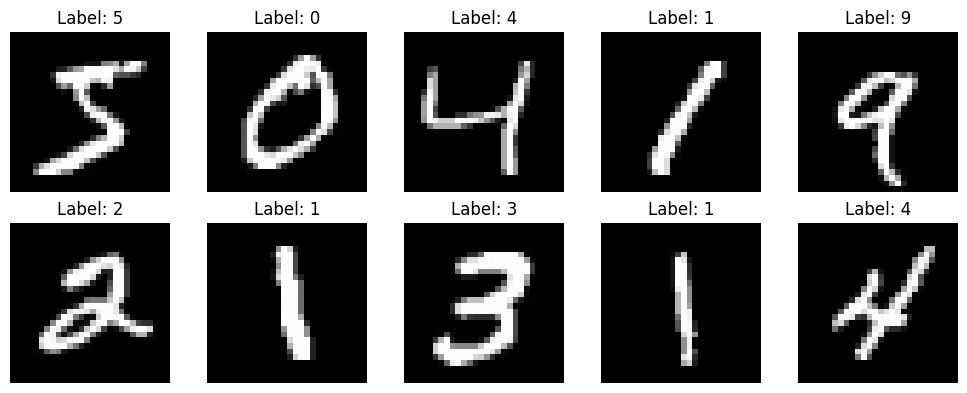

In [5]:
# Visualize some examples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 3: Preprocess the Data

**Key preprocessing steps:**
1. Reshape to add channel dimension (28, 28) → (28, 28, 1)
2. Normalize pixel values from [0, 255] → [0, 1]
3. Convert labels to categorical (one-hot encoding)

In [6]:
# TODO: Reshape data to add channel dimension
# Hint: Use .reshape() with -1 for automatic batch size
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"New training shape: {X_train.shape}")
print(f"New test shape: {X_test.shape}")

New training shape: (60000, 28, 28, 1)
New test shape: (10000, 28, 28, 1)


In [7]:
# TODO: Normalize pixel values to [0, 1]
# Hint: Divide by 255.0 to convert uint8 to float32
X_train = X_train/255.0
X_test = X_test/255.0

print(f"Min pixel value: {X_train.min()}")
print(f"Max pixel value: {X_train.max()}")

Min pixel value: 0.0
Max pixel value: 1.0


In [8]:
# TODO: Convert labels to categorical (one-hot encoding)
# Hint: Use keras.utils.to_categorical()
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test);

print(f"Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_cat[0]}")

Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step 4: Build the CNN Model

**Architecture to implement:**
1. Conv2D layer: 32 filters, 3x3 kernel, ReLU activation
2. MaxPooling2D: 2x2 pool size
3. Conv2D layer: 64 filters, 3x3 kernel, ReLU activation
4. MaxPooling2D: 2x2 pool size
5. Flatten layer
6. Dense layer: 128 units, ReLU activation
7. Dropout: 0.5
8. Dense output layer: 10 units, softmax activation

In [9]:
# TODO: Build the CNN model using keras.Sequential
model = keras.Sequential([


#     # First convolutional block
      layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28, 28, 1)),
      layers.MaxPooling2D((2,2)),
#
#     # Second convolutional block
      layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (28, 28, 1)),
      layers.MaxPooling2D((2,2)),
#
#     # Fully connected layers
      layers.Flatten(),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(10, activation = 'softmax')
])

# Print model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model

**Compilation parameters:**
- Optimizer: Adam
- Loss function: Categorical crossentropy
- Metrics: Accuracy

In [10]:
# TODO: Compile the model
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Step 6: Train the Model

In [11]:
# TODO: Train the model
# Hint: Use validation_split=0.1 to monitor validation accuracy
# Use epochs=10 and batch_size=128
history = model.fit(
    X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 128, verbose = 1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.8446 - loss: 0.5290 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.9811 - loss: 0.0648 - val_accuracy: 0.9835 - val_loss: 0.0595
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9875 - loss: 0.0409 - val_accuracy: 0.9872 - val_loss: 0.0429
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9903 - loss: 0.0318 - val_accuracy: 0.9883 - val_loss: 0.0413
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9897 - val_loss: 0.0330
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9882 - val_loss: 0.0463
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.9966 - loss: 0.0110 -

## Step 7: Evaluate the Model

In [12]:
# TODO: Evaluate on test set and print accuracy and loss
# Hint: Use model.evaluate()
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
print(test_loss,'\n', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0380
0.030628781765699387 
 0.9908999800682068


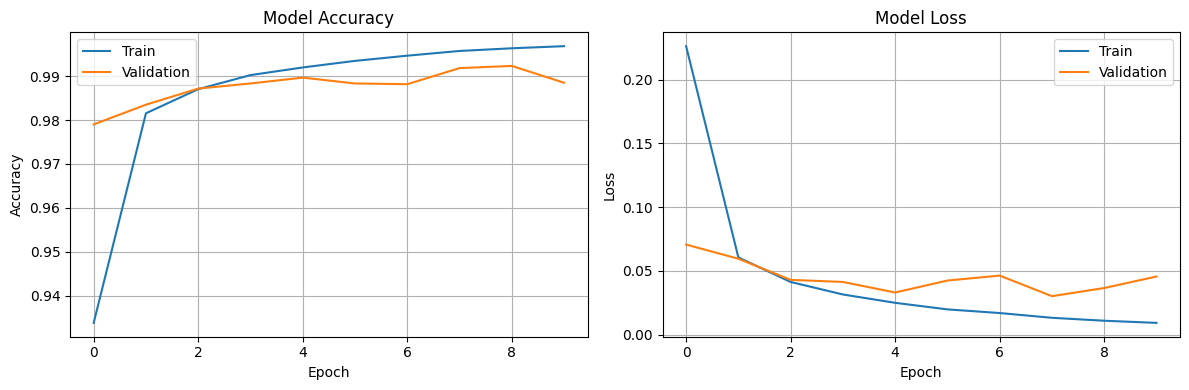

In [13]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 8: Make Predictions and Visualize Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


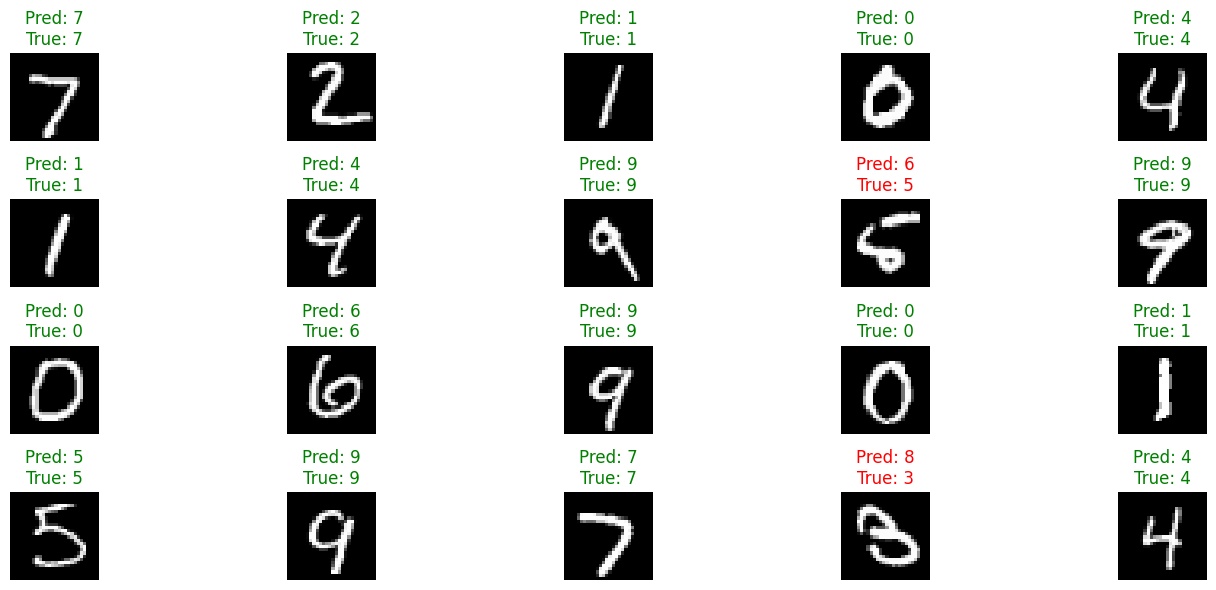

In [14]:
# Make predictions
predictions = model.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_classes[i] == y_test[i] else 'red'
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {y_test[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 9: Analyze Misclassifications

In [20]:
# TODO: Find all misclassified examples in the test set
# Hint: Use np.where() to find indices where predicted label != true label
# Then print the total count and error rate
y_pred_probs = model.predict(X_test)
predicted_labels = np.argmax(y_pred_probs, axis = 1)
misclassified  = np.where(predicted_labels != y_test)[0]
count = len(misclassified)
error = count/len(y_test)
print(error)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
0.0091


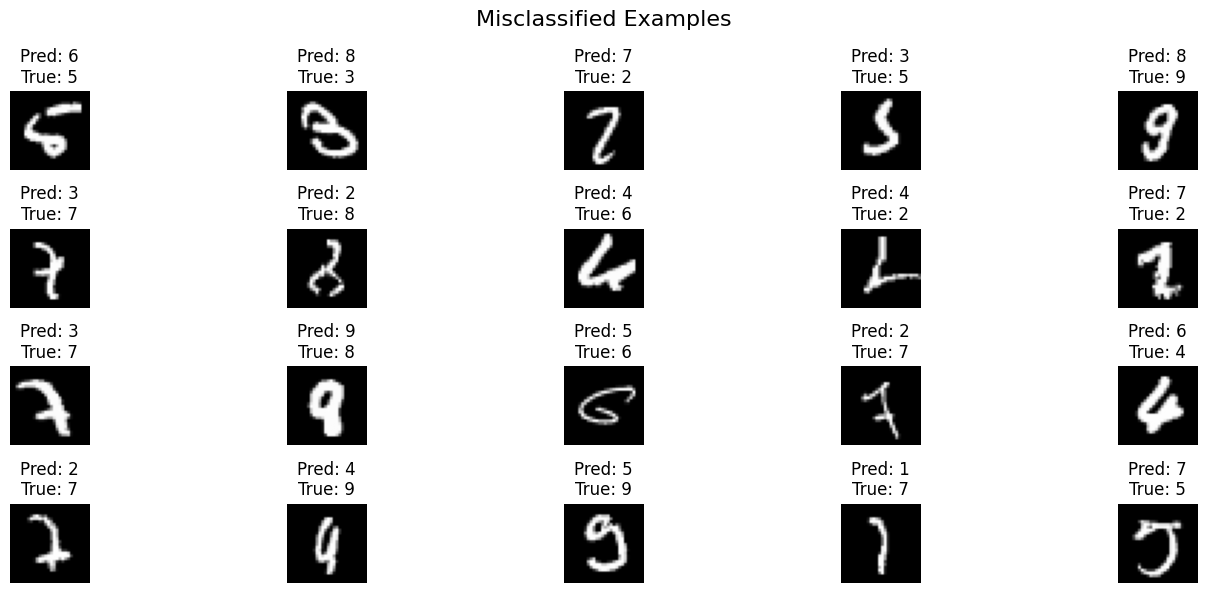

In [21]:
# Visualize some misclassified examples
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.suptitle('Misclassified Examples', fontsize=16)
plt.tight_layout()
plt.show()

## Step 10: Visualize Learned Filters (Optional)

Let's see what patterns the first convolutional layer learned!

Filter shape: (3, 3, 1, 32)


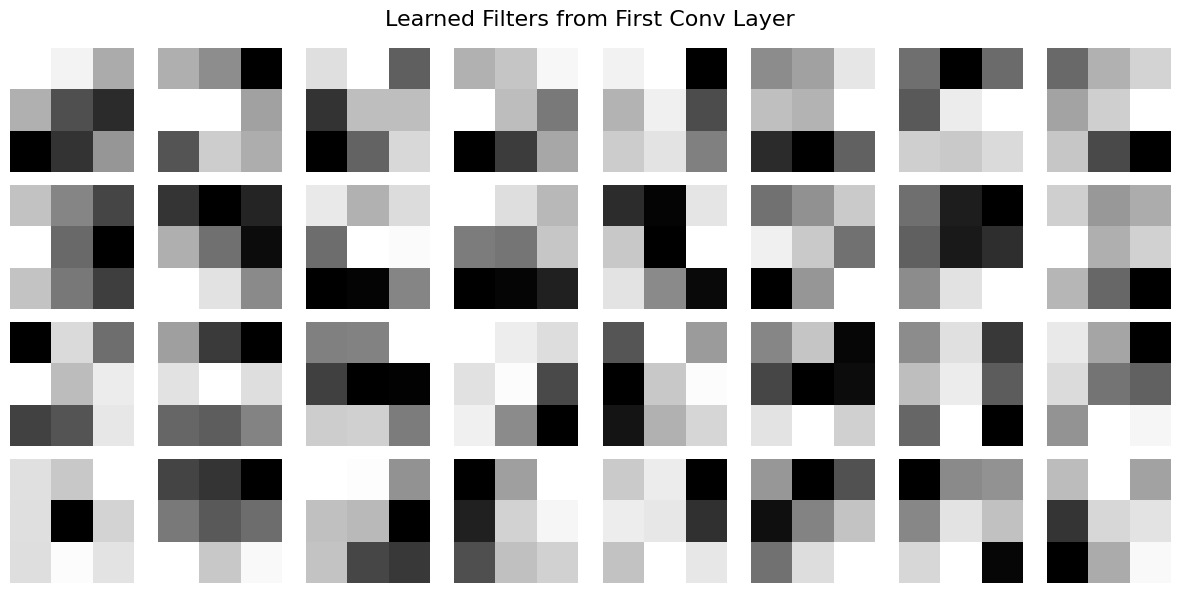

In [19]:
# Get weights from first convolutional layer
filters, biases = model.layers[0].get_weights()
print(f"Filter shape: {filters.shape}")  # (3, 3, 1, 32)

# Normalize filters for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Plot first 32 filters
plt.figure(figsize=(12, 6))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_normalized[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Filters from First Conv Layer', fontsize=16)
plt.tight_layout()
plt.show()

## 🏆 Challenge Tasks

Try these to deepen your understanding:

1. **Improve accuracy to >98%:** Add more Conv layers or increase filters
2. **Data augmentation:** Add rotation, zoom, and shift transformations
3. **Confusion matrix:** Visualize which digits are commonly confused
4. **Feature maps:** Visualize activations from intermediate layers
5. **Fashion-MNIST:** Apply this model to Fashion-MNIST dataset

## 📊 Reflection Questions

1. Why do we use MaxPooling layers?
2. What happens if you remove the Dropout layer?
3. Why is the first Conv layer filter count (32) smaller than the second (64)?
4. How would you modify this for RGB images?
5. What does each filter in the first Conv layer detect?